# Análisis preliminar

Hacemos un aexploración para observar cómo podemos enfocar nuestras historia en Tableau. 

¿Qué vamos a contar?
¿Cómo lo queremos contar?

In [1]:
import warnings
warnings.filterwarnings("ignore")

import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./athlete_events.csv')
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
# Mostrar las primeras filas del DataFrame
df.head(), df.describe(include='all')


(   ID                      Name Sex   Age  Height  Weight            Team  \
 0   1                 A Dijiang   M  24.0   180.0    80.0           China   
 1   2                  A Lamusi   M  23.0   170.0    60.0           China   
 2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
 3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
 4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
 
    NOC        Games  Year  Season       City          Sport  \
 0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
 1  CHN  2012 Summer  2012  Summer     London           Judo   
 2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
 3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
 4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   
 
                               Event Medal  
 0       Basketball Men's Basketball   NaN  
 1      Judo Men's Extra-Lightweight   NaN  
 2       

# Distribución de medallas por país

In [5]:
medallas_por_pais = df[df['Medal'].notna()].groupby('Team')['Medal'].count().sort_values(ascending=False)
print(medallas_por_pais.head(10))  # Mostrar los 10 primeros países


Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Medal, dtype: int64


# Comparar medallas por género

In [6]:
medallas_por_genero = df[df['Medal'].notna()].groupby('Sex')['Medal'].count()
print(medallas_por_genero)


Sex
F    11253
M    28530
Name: Medal, dtype: int64


# Distribución de edades

<Axes: >

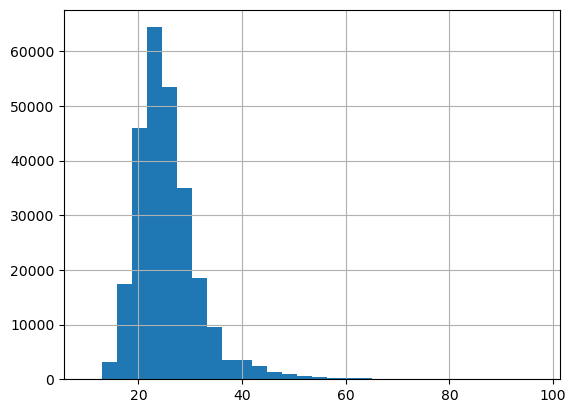

In [7]:
df['Age'].hist(bins=30)


# Deportes más populares

In [8]:
deportes_populares = df['Sport'].value_counts()
print(deportes_populares.head(10))  # Mostrar los 10 deportes más populares


Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: Sport, dtype: int64


# Altura y peso por deporte

In [9]:
altura_peso_por_deporte = df.groupby('Sport')[['Height', 'Weight']].mean()
print(altura_peso_por_deporte)


                      Height     Weight
Sport                                  
Aeronautics              NaN        NaN
Alpine Skiing     173.489052  72.068110
Alpinism                 NaN        NaN
Archery           173.203085  70.011135
Art Competitions  174.644068  75.290909
...                      ...        ...
Tug-Of-War        182.480000  95.615385
Volleyball        186.994822  78.900214
Water Polo        184.834648  84.566446
Weightlifting     167.824801  78.726663
Wrestling         172.358586  75.495570

[66 rows x 2 columns]


# Rendimiento por edición de los JJOO

In [10]:
medallas_por_edicion = df[df['Medal'].notna()].groupby('Year')['Medal'].count()
print(medallas_por_edicion)


Year
1896     143
1900     604
1904     486
1906     458
1908     831
1912     941
1920    1308
1924     962
1928     823
1932     739
1936    1025
1948     987
1952    1033
1956    1043
1960    1058
1964    1215
1968    1256
1972    1414
1976    1531
1980    1602
1984    1698
1988    1845
1992    2030
1994     331
1996    1842
1998     440
2000    2004
2002     478
2004    2001
2006     526
2008    2048
2010     520
2012    1941
2014     597
2016    2023
Name: Medal, dtype: int64


# Medallas por deporte y país

In [11]:
# Filtrar filas donde hay medallas
df_medallas = df[df['Medal'].notna()]

# Agrupar por país y deporte, y contar el número de medallas
medallas_por_deporte_pais = df_medallas.groupby(['Team', 'Sport'])['Medal'].count().unstack(fill_value=0)

# Mostrar el DataFrame resultante
print(medallas_por_deporte_pais)

Sport                         Aeronautics  Alpine Skiing  Alpinism  Archery  \
Team                                                                          
A North American Team                   0              0         0        0   
Afghanistan                             0              0         0        0   
Algeria                                 0              0         0        0   
Ali-Baba II                             0              0         0        0   
Amateur Athletic Association            0              0         0        0   
...                                   ...            ...       ...      ...   
Winnipeg Shamrocks-1                    0              0         0        0   
Yugoslavia                              0              2         0        0   
Zambia                                  0              0         0        0   
Zimbabwe                                0              0         0        0   
Zut                                     0           

In [12]:
print(medallas_por_deporte_pais)

Sport                         Aeronautics  Alpine Skiing  Alpinism  Archery  \
Team                                                                          
A North American Team                   0              0         0        0   
Afghanistan                             0              0         0        0   
Algeria                                 0              0         0        0   
Ali-Baba II                             0              0         0        0   
Amateur Athletic Association            0              0         0        0   
...                                   ...            ...       ...      ...   
Winnipeg Shamrocks-1                    0              0         0        0   
Yugoslavia                              0              2         0        0   
Zambia                                  0              0         0        0   
Zimbabwe                                0              0         0        0   
Zut                                     0           

# Evolución medallas a lo largo de los años

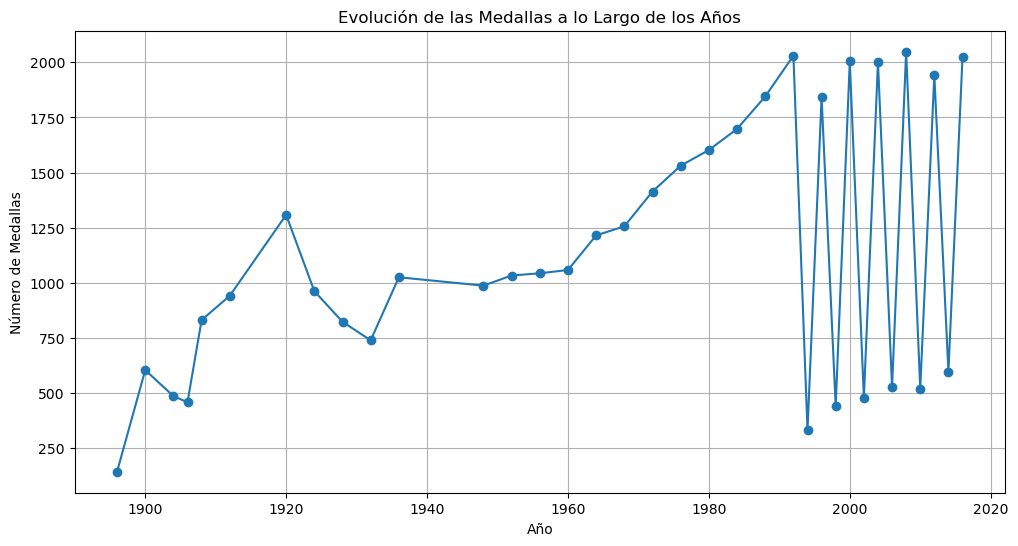

In [13]:
# Filtrar filas donde hay medallas
df_medallas = df[df['Medal'].notna()]

# Agrupar por año y contar el número de medallas
medallas_por_año = df_medallas.groupby('Year')['Medal'].count()

# Graficar la evolución de las medallas a lo largo de los años
plt.figure(figsize=(12, 6))
medallas_por_año.plot(kind='line', marker='o')
plt.title('Evolución de las Medallas a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Medallas')
plt.grid(True)
plt.show()

# Medallas según los juegos de iniverno y los de verano

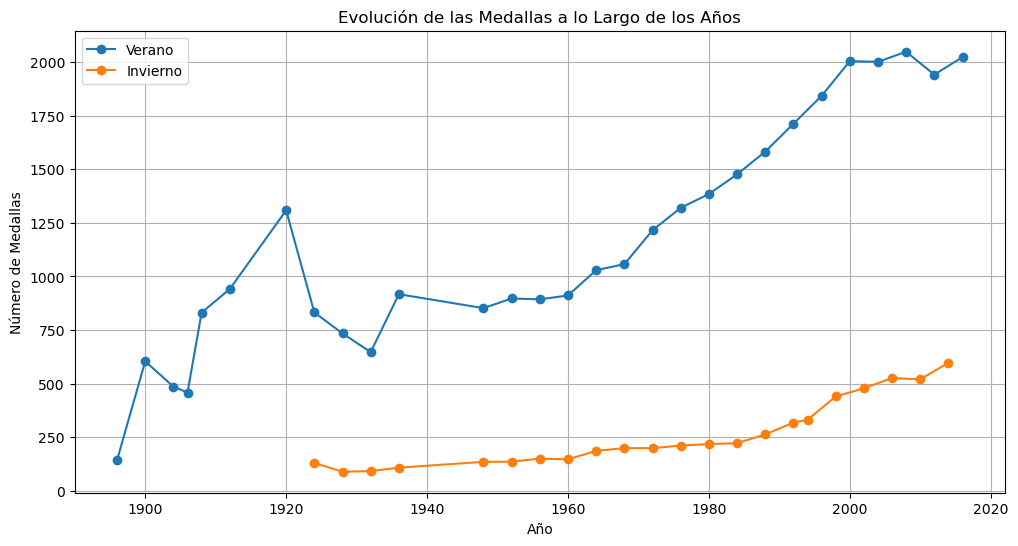

In [14]:
# Filtrar filas donde hay medallas
df_medallas = df[df['Medal'].notna()]

# Separar las ediciones de verano y de invierno
verano = df_medallas[df_medallas['Season'] == 'Summer']
invierno = df_medallas[df_medallas['Season'] == 'Winter']

# Agrupar por año y contar el número de medallas para cada temporada
medallas_verano_por_año = verano.groupby('Year')['Medal'].count()
medallas_invierno_por_año = invierno.groupby('Year')['Medal'].count()

# Graficar la evolución de las medallas a lo largo de los años para cada temporada
plt.figure(figsize=(12, 6))
plt.plot(medallas_verano_por_año, marker='o', label='Verano')
plt.plot(medallas_invierno_por_año, marker='o', label='Invierno')
plt.title('Evolución de las Medallas a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Medallas')
plt.legend()
plt.grid(True)
plt.show()

# Diferencia medallas por estación

In [20]:
verano = df_medallas[df_medallas['Season'] == 'Summer']
invierno = df_medallas[df_medallas['Season'] == 'Winter']

# Agrupar por año y contar el número de medallas para cada temporada
medallas_verano_por_año = verano.groupby('Year')['Medal'].count()
medallas_invierno_por_año = invierno.groupby('Year')['Medal'].count()

# Calcular las diferencias absolutas año a año
diferencias_verano = medallas_verano_por_año.diff().abs()
diferencias_invierno = medallas_invierno_por_año.diff().abs()

# Mostrar los años y las diferencias de medallas
diferencias_verano.dropna().reset_index(name='Diferencia Verano')
diferencias_invierno.dropna().reset_index(name='Diferencia Invierno')

,Year,Diferencia Invierno
0,1928,41.0
1,1932,3.0
2,1936,16.0
3,1948,27.0
4,1952,1.0
5,1956,14.0
6,1960,3.0
7,1964,39.0
8,1968,13.0
9,1972,0.0


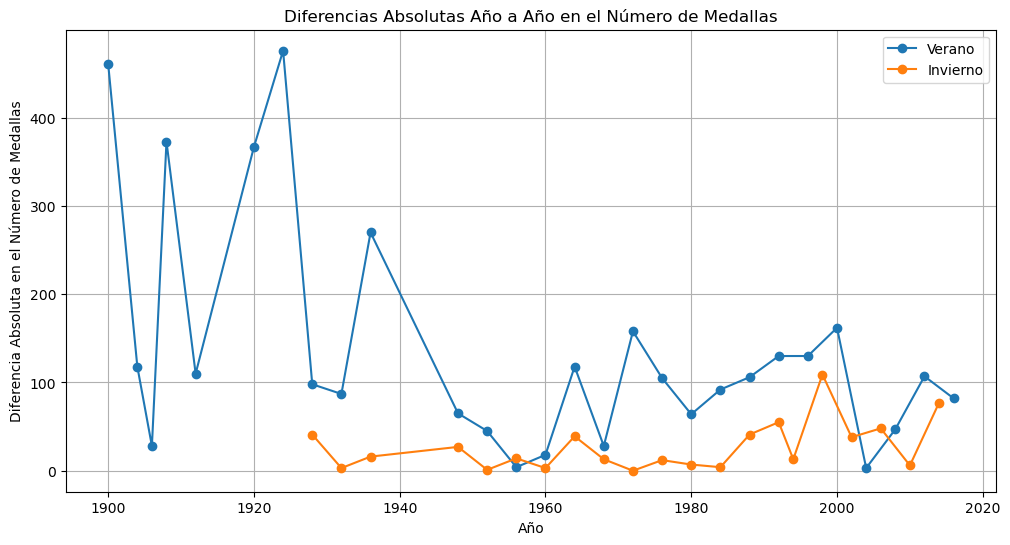

In [15]:
# Filtrar filas donde hay medallas
df_medallas = df[df['Medal'].notna()]

# Separar las ediciones de verano y de invierno
verano = df_medallas[df_medallas['Season'] == 'Summer']
invierno = df_medallas[df_medallas['Season'] == 'Winter']

# Agrupar por año y contar el número de medallas para cada temporada
medallas_verano_por_año = verano.groupby('Year')['Medal'].count()
medallas_invierno_por_año = invierno.groupby('Year')['Medal'].count()

# Calcular las diferencias absolutas año a año
diferencias_verano = medallas_verano_por_año.diff().abs()
diferencias_invierno = medallas_invierno_por_año.diff().abs()

# Graficar las diferencias absolutas año a año
plt.figure(figsize=(12, 6))
plt.plot(diferencias_verano, marker='o', label='Verano')
plt.plot(diferencias_invierno, marker='o', label='Invierno')
plt.title('Diferencias Absolutas Año a Año en el Número de Medallas')
plt.xlabel('Año')
plt.ylabel('Diferencia Absoluta en el Número de Medallas')
plt.legend()
plt.grid(True)
plt.show()